<a href="https://colab.research.google.com/github/ibukunlola/capstone/blob/main/model3/data_cleaning3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python notebook for prepping the data for use.

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
# load raw fdi, gdp, gni, political stability, and population, data from github
fdi = pd.read_csv("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/02_01_fdi.csv")
gdp = pd.read_csv("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/02_01_gdp.csv")
gni = pd.read_csv("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/02_01_gni.csv")
pol_stab = pd.read_csv("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/02_01_pol_stab.csv")
pop = pd.read_csv("https://raw.githubusercontent.com/ibukunlola/capstone/main/model3/02_01_pop.csv")

In [ ]:
#Create empty dataframes that will later hold data on each variable in the same format with column names
## 'country_name, 'year', and 'variable_name'. This process will make it easier to merge the individual
## dataframes into the clean_df dataframe
 
clean_df = pd.DataFrame(columns=['country_name', 'year', 'fdi', 'gdp', 'gni', 'pol_stab', 'pop'])
clean_df_fdi = pd.DataFrame(columns=['country_name', 'year', 'fdi'])
clean_df_pol_stab = pd.DataFrame(columns=['country_name', 'year', 'pol_stab'])
clean_df_gni = pd.DataFrame(columns=['country_name', 'year', 'gni'])
clean_df_gdp = pd.DataFrame(columns=['country_name', 'year', 'gdp'])
clean_df_pop = pd.DataFrame(columns=['country_name', 'year', 'pop'])

In [ ]:
# The 'insertion' function reorganizes the raw dataframes into the 'country_name', 'year', 'fdi' format

def insertion(df, data):
  index = 0
  for _, row in data.iterrows():
    for year in range(2010, 2020):
      df.loc[index] = [row["Country Name"], year, row[str(year)]]
      index += 1

In [ ]:
# Apply the 'insertion' function to reorganize the dataframes on all 5 variables

insertion(clean_df_fdi, fdi)
insertion(clean_df_pol_stab, pol_stab)
insertion(clean_df_gni, gni)
insertion(clean_df_gdp, gdp)
insertion(clean_df_pop, pop)

In [ ]:
clean_df_gdp.head(5)

,country_name,year,gdp
0,Afghanistan,2010,1.585668e+10
1,Afghanistan,2011,1.780511e+10
2,Afghanistan,2012,1.990732e+10
3,Afghanistan,2013,2.014640e+10
4,Afghanistan,2014,2.049713e+10


In [ ]:
# Merge all the reorganized dataframes into the clean_df dataframe 

clean_df = clean_df_fdi.merge(clean_df_pol_stab, how='inner', left_on=["country_name", "year"], right_on=["country_name", "year"])
clean_df = clean_df.merge(clean_df_gni, how='inner', left_on=["country_name", "year"], right_on=["country_name", "year"])
clean_df = clean_df.merge(clean_df_gdp, how='inner', left_on=["country_name", "year"], right_on=["country_name", "year"])
clean_df = clean_df.merge(clean_df_pop, how='inner', left_on=["country_name", "year"], right_on=["country_name", "year"])

In [ ]:
# change the datatype of clean_df's 'pop' column to float so we can obtain its summary statistics
clean_df.to_csv("clean_df.csv")
clean_df.describe()

,fdi,pol_stab,gni,gdp
count,1.807000e+03,2049.000000,1.945000e+03,2.018000e+03
mean,-1.471202e+09,-0.029634,4.035150e+11,3.893695e+11
std,2.582627e+10,0.998170,1.646665e+12,1.598286e+12
min,-3.443310e+11,-3.130971,4.940153e+07,3.182352e+07
25%,-1.956775e+09,-0.656952,8.081767e+09,6.418320e+09
50%,-4.115760e+08,0.046885,3.033211e+10,2.728720e+10
75%,-2.863453e+07,0.840857,1.954456e+11,1.924439e+11
max,2.179476e+11,1.965062,2.170865e+13,2.143322e+13


In [ ]:
# Calculate the percentages of missing values per variable
## Note that ~12% of the fdi data is missing which isn't inconsequential unlike the others where about 5% or less are missing
clean_df.isnull().sum() * 100 / len(clean_df)

country_name     0.000000
year             0.000000
fdi             11.853659
pol_stab         0.048780
gni              5.121951
gdp              1.560976
pop              0.390244
dtype: float64

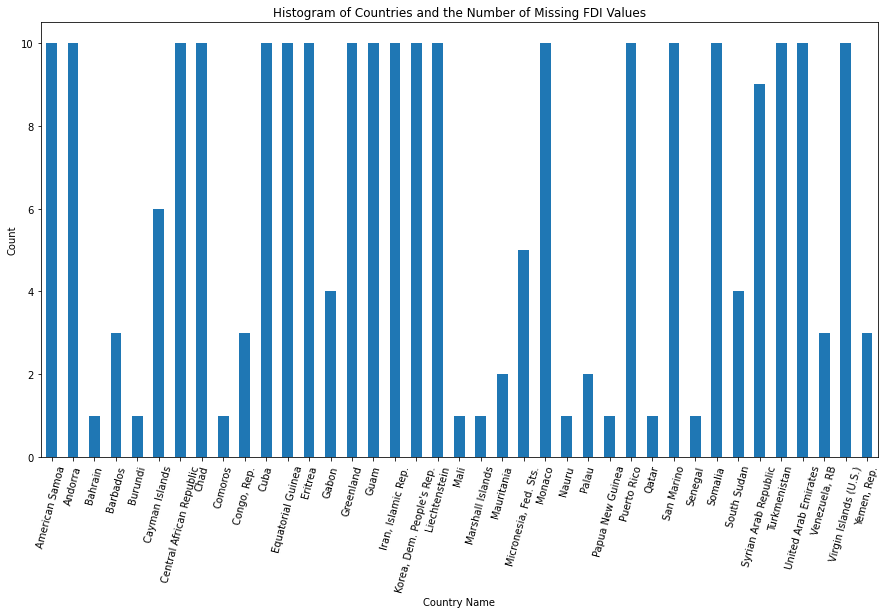

In [ ]:
# get indices of missing fdi values and their corresponding countries
missing_fdi = clean_df[clean_df['fdi'].isnull()].index.tolist()

# get the country names of each index with missing fdi values
# there are 39 countries with missing fdi values
missing_fdi_name = []
for i in missing_fdi:
  missing_fdi_name.append(clean_df.loc[i, 'country_name'])

# count the number of years for which each country has missing fdi data
counts = Counter(missing_fdi_name)
missing_fdi_df = pd.DataFrame.from_dict(counts, orient='index')
missing_fdi_df.plot(kind='bar', figsize=(15,8), title='Histogram of Countries and the Number of Missing FDI Values',
        xlabel='Country Name', ylabel='Count', rot=75, legend=False);

In [ ]:
nan_removed_df = clean_df
for i in missing_fdi_df.index.values:
  nan_removed_df = nan_removed_df[nan_removed_df['country_name'] != i]

#nan_removed_df is clean_df after all countries missing fdi values have been removed (390 rows deleted) 

In [ ]:
# after deleting countries with missing fdi values, we find that we have significantly reduced all missing values across the dataset.
print(nan_removed_df.isnull().sum() * 100 / len(nan_removed_df))
# we still have some missing gni and fdi values <0.1% of the dataset, so we can replace those missing values with the mean to be able to work with them
nan_removed_df = nan_removed_df.fillna(nan_removed_df.mean())
nan_removed_df.describe()

country_name    0.000000
year            0.000000
fdi             0.000000
pol_stab        0.000000
gni             0.060241
gdp             0.060241
pop             0.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,year,fdi,pol_stab,gni,gdp,pop
count,1660.000000,1.660000e+03,1660.000000,1.660000e+03,1.660000e+03,1.660000e+03
mean,2014.500000,-1.609203e+09,-0.009758,4.634975e+11,4.634345e+11,4.192126e+07
std,2.873147,2.693650e+10,0.917654,1.774981e+12,1.752858e+12,1.507973e+08
min,2010.000000,-3.443310e+11,-2.810035,4.940153e+07,3.182352e+07,1.052100e+04
25%,2012.000000,-2.201529e+09,-0.594227,1.018824e+10,1.013399e+10,2.058194e+06
50%,2014.500000,-4.795522e+08,0.047734,3.963752e+10,4.134629e+10,8.340436e+06
75%,2017.000000,-4.863929e+07,0.781028,2.335019e+11,2.369461e+11,3.009713e+07
max,2019.000000,2.179476e+11,1.639301,2.170865e+13,2.143322e+13,1.407745e+09


In [ ]:
# Another way to handle missing value problems is to replace all missing values 
## with the mean of its corresponding column
average_df = clean_df.fillna(clean_df.mean())
average_df.to_csv("average_df.csv")
average_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,year,fdi,pol_stab,gni,gdp,pop
count,2050.000000,2.050000e+03,2050.000000,2.050000e+03,2.050000e+03,2.050000e+03
mean,2014.500000,-1.471202e+09,-0.029634,4.035150e+11,3.893695e+11,3.563436e+07
std,2.872982,2.424653e+10,0.997927,1.603919e+12,1.585756e+12,1.364530e+08
min,2010.000000,-3.443310e+11,-3.130971,4.940153e+07,3.182352e+07,1.000900e+04
25%,2012.000000,-1.598808e+09,-0.656942,9.348736e+09,6.612486e+09,1.314666e+06
50%,2014.500000,-6.679294e+08,0.046716,3.639547e+10,2.926978e+10,7.166794e+06
75%,2017.000000,-5.860701e+07,0.840857,2.586884e+11,2.090672e+11,2.503902e+07
max,2019.000000,2.179476e+11,1.965062,2.170865e+13,2.143322e+13,1.407745e+09


Per-capita data formulation.